<a href="https://colab.research.google.com/github/rajiv1977/AI/blob/main/ConvolutionalNeuralNetworkImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Convolution Neural Network Implementation for image processing** \
**Example: Correctly identifying numbers between 0 - 9 on an image**

**Import packages**

In [50]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD
from keras.regularizers import Regularizer
from keras.callbacks import EarlyStopping, TensorBoard
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


**Load data**

In [51]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


**Understanding the image data format**

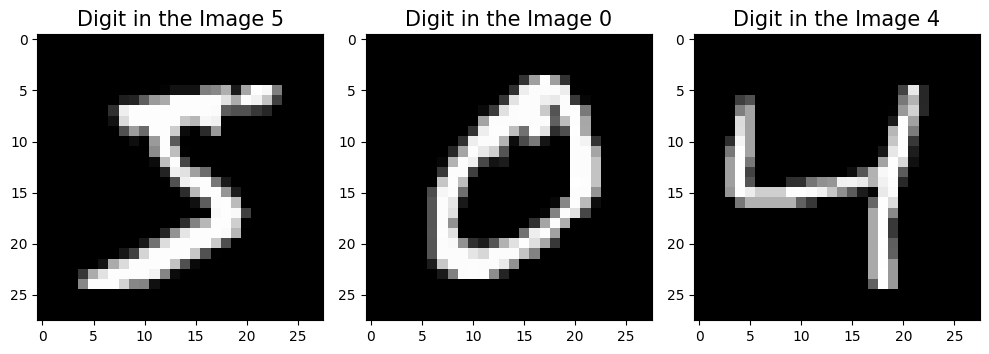

In [52]:
images = X_train[:3]
labels = y_train[:3]

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(nrows=1, ncols=3, figsize=(10,6))

# Iterate through the subplots and corresponding data
for index, (image, axis_) in enumerate(zip(images, axis)):
  # Use axis_ directly to plot on the current subplot
  axis_.imshow(image, cmap='gray')
  axis_.set_title(f"Digit in the Image {labels[index]}", size=15, ha="center")

plt.tight_layout()

# Combine all the operations and display
plt.show()

**Preprocessing the image data**

In [53]:
num_classes = 10
input_shape = (28, 28, 1)
X_train = X_train.reshape(X_train.shape[0], input_shape[0], input_shape[1], input_shape[2])
X_test = X_test.reshape(X_test.shape[0], input_shape[0], input_shape[1], input_shape[2])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

**How to tackle the overfitting** \
1.	Dropout of nodes randomly \
2.	Augmentation \


**Build model**

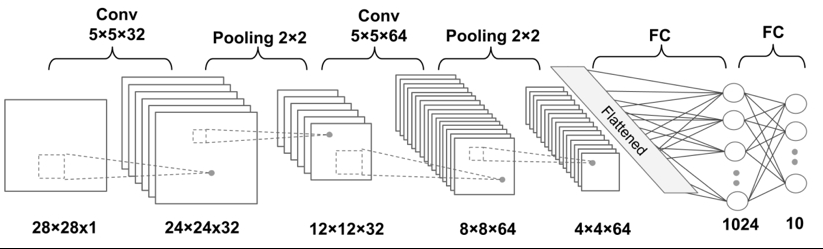

In [54]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu', padding='same', kernel_regularizer = 'l2'))
cnn.add(Dropout(0.2))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(64, kernel_size=(5, 5), activation='relu', padding='same', kernel_regularizer = 'l2'))
cnn.add(Dropout(0.2))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(1024, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile the model**

In [55]:
cnn.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.001), metrics=['accuracy'])
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       3,212,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,274,634 (12.49 MB)

 Trainable params: 3,274,634 (12.49 MB)

 Non-trainable params: 0 (0.00 B)

**Early stopping**

In [56]:
logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

**Train the model**

In [57]:
history_cnn = cnn.fit(X_train,
                      y_train,
                      batch_size=32,
                      epochs=25,
                      verbose=1,
                      validation_data=(X_test, y_test),
                      callbacks=[tensorboard_callback,es])

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 243s 129ms/step - accuracy: 0.4928 - loss: 2.3099 - val_accuracy: 0.8893 - val_loss: 1.0042
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 259s 128ms/step - accuracy: 0.8933 - loss: 0.8264 - val_accuracy: 0.9232 - val_loss: 0.7834
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 264s 129ms/step - accuracy: 0.9170 - loss: 0.6990 - val_accuracy: 0.9353 - val_loss: 0.6987
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 240s 128ms/step - accuracy: 0.9321 - loss: 0.6232 - val_accuracy: 0.9476 - val_loss: 0.6327
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 262s 128ms/step - accuracy: 0.9429 - loss: 0.5716 - val_accuracy: 0.9521 - val_loss: 0.5839
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 262s 128ms/step - accuracy: 0.9459 - loss: 0.5328 - val_accuracy: 0.9564 - val_loss: 0.5435
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 236s 126ms/step - accuracy: 0.9537 - loss: 0.4920 - val_accuracy: 0.9607 - val_loss: 0.5037
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 265s 128ms/step - ac

**What is the accuracy of the model?**

**Plot the accuracy of the training model**

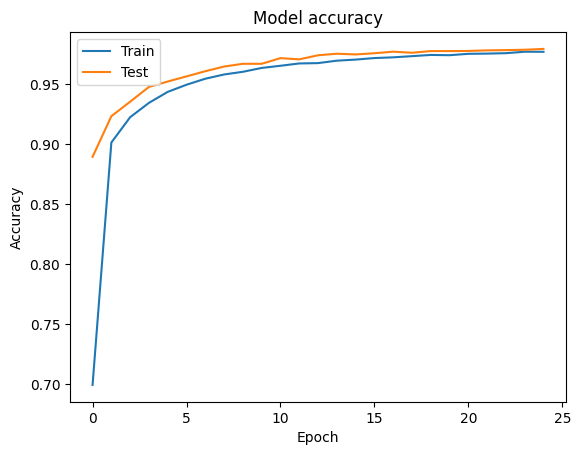

In [58]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

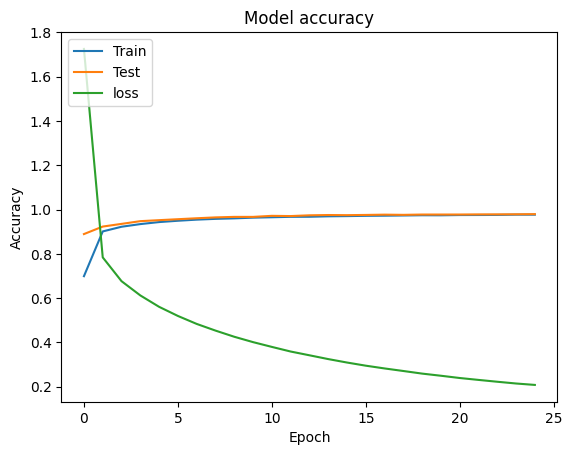

In [59]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.plot(history_cnn.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test', 'loss'], loc='upper left')

**Evaluvating the model**

In [60]:
score = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9763 - loss: 0.2445
